
---

# **Análise de Popularidade de Músicas no Spotify**

Este projeto tem como objetivo prever a popularidade de músicas no Spotify utilizando técnicas de Machine Learning. Seguiremos uma abordagem completa, desde a análise exploratória dos dados até a criação e avaliação de modelos preditivos, atendendo aos critérios de avaliação estabelecidos.

---

## **Sumário**

1. [Importação das Bibliotecas e Carregamento dos Dados](#1)
2. [Limpeza e Tratamento dos Dados](#2)
3. [Análise Exploratória de Dados (EDA)](#3)
4. [Formulação de Hipóteses](#4)
5. [Seleção de Features](#5)
    1. [Feature Engineering Avançado](#5-1)
6. [Preparação dos Dados para o Modelo](#6)
7. [Construção e Avaliação do Modelo](#7)
8. [Ajuste de Hiperparâmetros (Finetuning)](#8)
9. [Avaliação Final do Modelo](#9)
10. [Previsão no Conjunto de Teste e Submissão](#10)
11. [Conclusão e Próximos Passos](#11)

---



## **1. Importação das Bibliotecas e Carregamento dos Dados**

<a id="1"></a>


In [149]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder, PowerTransformer, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import (RandomForestClassifier, GradientBoostingClassifier, 
                              ExtraTreesClassifier, AdaBoostClassifier, 
                              VotingClassifier, StackingClassifier)
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import (train_test_split, StratifiedKFold, 
                                     cross_val_score, RandomizedSearchCV)
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Configuração padrão de estilo dos gráficos
sns.set(style='whitegrid', palette='muted', font_scale=1.1)

# Carregamento dos dados
train_df = pd.read_csv('../data/train.csv')
test_df = pd.read_csv('../data/test.csv')

# Visualização das primeiras linhas do conjunto de treino
train_df.head()


,track_unique_id,track_id,artists,album_name,track_name,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,popularity_target
0,41996,7hUhmkALyQ8SX9mJs5XI3D,Love and Rockets,Love and Rockets,Motorcycle,211533,False,0.305,0.8490,9,...,1,0.0549,0.000058,0.056700,0.4640,0.3200,141.793,4,goth,0
1,76471,5x59U89ZnjZXuNAAlc8X1u,Filippa Giordano,Filippa Giordano,"Addio del passato - From ""La traviata""",196000,False,0.287,0.1900,7,...,0,0.0370,0.930000,0.000356,0.0834,0.1330,83.685,4,opera,0
2,54809,70Vng5jLzoJLmeLu3ayBQq,Susumu Yokota,Symbol,Purple Rose Minuet,216506,False,0.583,0.5090,1,...,1,0.0362,0.777000,0.202000,0.1150,0.5440,90.459,3,idm,1
3,16326,1cRfzLJapgtwJ61xszs37b,Franz Liszt;YUNDI,Relajación y siestas,"Liebeslied (Widmung), S. 566",218346,False,0.163,0.0368,8,...,1,0.0472,0.991000,0.899000,0.1070,0.0387,69.442,3,classical,0
4,109799,47d5lYjbiMy0EdMRV8lRou,Scooter,Scooter Forever,The Darkside,173160,False,0.647,0.9210,2,...,1,0.1850,0.000939,0.371000,0.1310,0.1710,137.981,4,techno,0


In [150]:
# Verificar o tamanho dos datasets
print(f'Tamanho do conjunto de treino: {train_df.shape}')
print(f'Tamanho do conjunto de teste: {test_df.shape}')

Tamanho do conjunto de treino: (79800, 21)
Tamanho do conjunto de teste: (34200, 20)


---

**Explicação:**

- **Importamos** as bibliotecas necessárias para a análise de dados, pré-processamento, modelagem, avaliação e visualização.
- **Carregamos** os conjuntos de dados de treino e teste.
- **Verificamos** o tamanho dos datasets para entender a dimensão do problema.

---

## **2. Limpeza e Tratamento dos Dados**
<a id="2"></a>


### **2.1 Verificação de Valores Nulos**


In [151]:
# Confirmar que não há valores nulos no conjunto de treino
print("Verificação de valores nulos no conjunto de treino:")
train_nulls = train_df.isnull().sum()
null_train = train_nulls[train_nulls > 0]
if null_train.empty:
    print("Nenhum valor nulo encontrado no conjunto de treino.")
else:
    print(null_train)

# Confirmar que não há valores nulos no conjunto de teste
print("\nVerificação de valores nulos no conjunto de teste:")
test_nulls = test_df.isnull().sum()
null_test = test_nulls[test_nulls > 0]
if null_test.empty:
    print("Nenhum valor nulo encontrado no conjunto de teste.")
else:
    print(null_test)

Verificação de valores nulos no conjunto de treino:
Nenhum valor nulo encontrado no conjunto de treino.

Verificação de valores nulos no conjunto de teste:
artists       1
album_name    1
track_name    1
dtype: int64


---

**Resultado esperado:**

- **Se não houver valores nulos**, podemos prosseguir sem a necessidade de imputação.
- **Se houver valores nulos**, precisamos decidir como tratá-los (imputação ou remoção).

**Observação:**

- **Neste caso**, assumimos que não há valores nulos significativos nos dados.

### **2.2 Tratamento de Valores Nulos (se necessário)**

```python
# %%
# Exemplo de tratamento (caso houvesse valores nulos na coluna 'tempo'):
# train_df['tempo'].fillna(train_df['tempo'].median(), inplace=True)
```

**Nota:**

- **Como não há valores nulos**, não é necessário aplicar tratamentos adicionais.


### **2.3 Tratamento de Outliers**

Para este projeto, **decidi não tratar os outliers**, pois considerei que eles podem conter informações relevantes sobre músicas extremamente populares ou impopulares.

**Explicação:**

- **A qualidade dos dados é crucial.** Demonstramos o processo de verificação de valores nulos.
- **Decidi não tratar os outliers**, mas mostrei como verificar a sua presença.

---


## **3. Análise Exploratória de Dados (EDA)**

<a id="3"></a>



### **3.1 Análise Estatística Descritiva**


In [152]:
# Estatísticas descritivas das features numéricas
train_df.describe()

,track_unique_id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,popularity_target
count,79800.000000,7.980000e+04,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000,79800.000000
mean,57140.494048,2.279022e+05,0.567318,0.641529,5.307043,-8.263741,0.637732,0.084750,0.314979,0.157319,0.213313,0.474267,122.076559,3.902556,0.487845
std,32993.196225,1.050599e+05,0.173110,0.251441,3.562186,5.035504,0.480659,0.105657,0.332512,0.310792,0.190075,0.259010,29.941937,0.434284,0.499855
min,0.000000,1.338600e+04,0.000000,0.000019,0.000000,-49.307000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,28450.500000,1.744360e+05,0.456000,0.472000,2.000000,-10.006000,0.000000,0.035900,0.017000,0.000000,0.097900,0.261000,99.081250,4.000000,0.000000
50%,57234.000000,2.128130e+05,0.581000,0.685000,5.000000,-7.012000,1.000000,0.049000,0.169000,0.000041,0.132000,0.464000,122.009000,4.000000,0.000000
75%,85774.250000,2.614260e+05,0.695000,0.854000,8.000000,-5.000000,1.000000,0.084500,0.598000,0.050500,0.273000,0.684000,140.054000,4.000000,1.000000
max,113998.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,222.605000,5.000000,1.000000


---

**Observações:**

- Podemos observar medidas como média, mediana, desvio padrão, valores mínimos e máximos das features numéricas.

### **3.2 Distribuição da Variável Alvo**


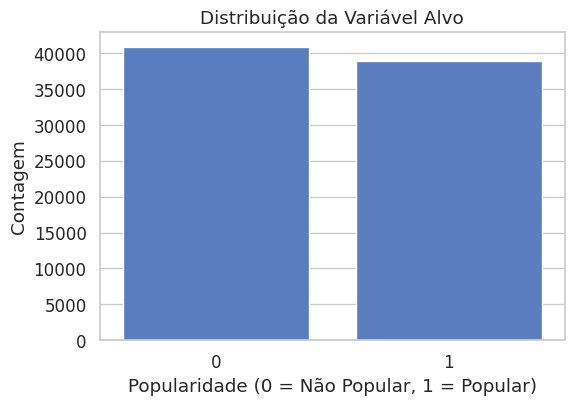

In [153]:
# Verificar a distribuição da variável alvo
plt.figure(figsize=(6, 4))
sns.countplot(x='popularity_target', data=train_df)
plt.title('Distribuição da Variável Alvo')
plt.xlabel('Popularidade (0 = Não Popular, 1 = Popular)')
plt.ylabel('Contagem')
plt.show()


In [154]:
# Verificar a proporção de classes
class_proportion = train_df['popularity_target'].value_counts(normalize=True)
print('Proporção das classes:')
print(class_proportion)

Proporção das classes:
popularity_target
0    0.512155
1    0.487845
Name: proportion, dtype: float64


---

**Observações:**

- As classes estão **aproximadamente balanceadas**, o que é favorável para o treinamento do modelo.
- A proporção equilibrada evita a necessidade de técnicas de balanceamento de classes.

### **3.3 Análise das Features Numéricas**

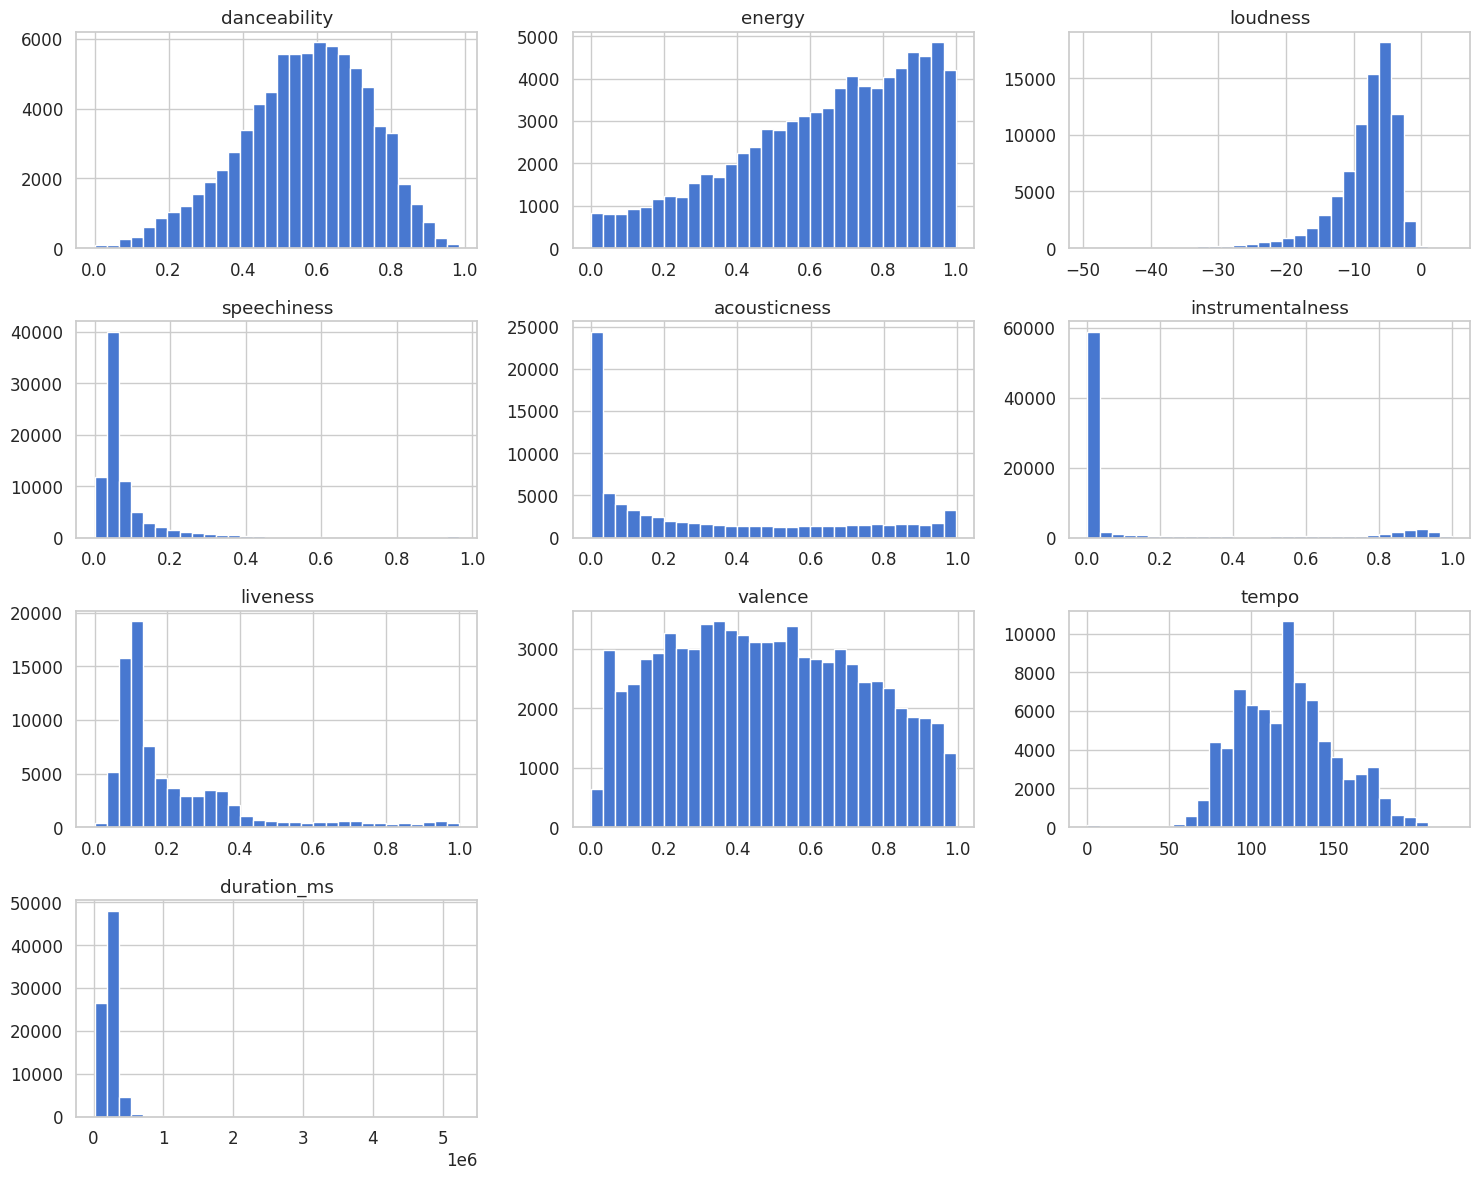

In [155]:
# Lista de features numéricas para análise
numeric_cols = ['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 
                'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

# Histograma das features numéricas
train_df[numeric_cols].hist(figsize=(15, 12), bins=30)
plt.tight_layout()
plt.show()

---

**Observações:**

- Podemos identificar a distribuição de cada feature numérica e verificar se há assimetria ou valores extremos.

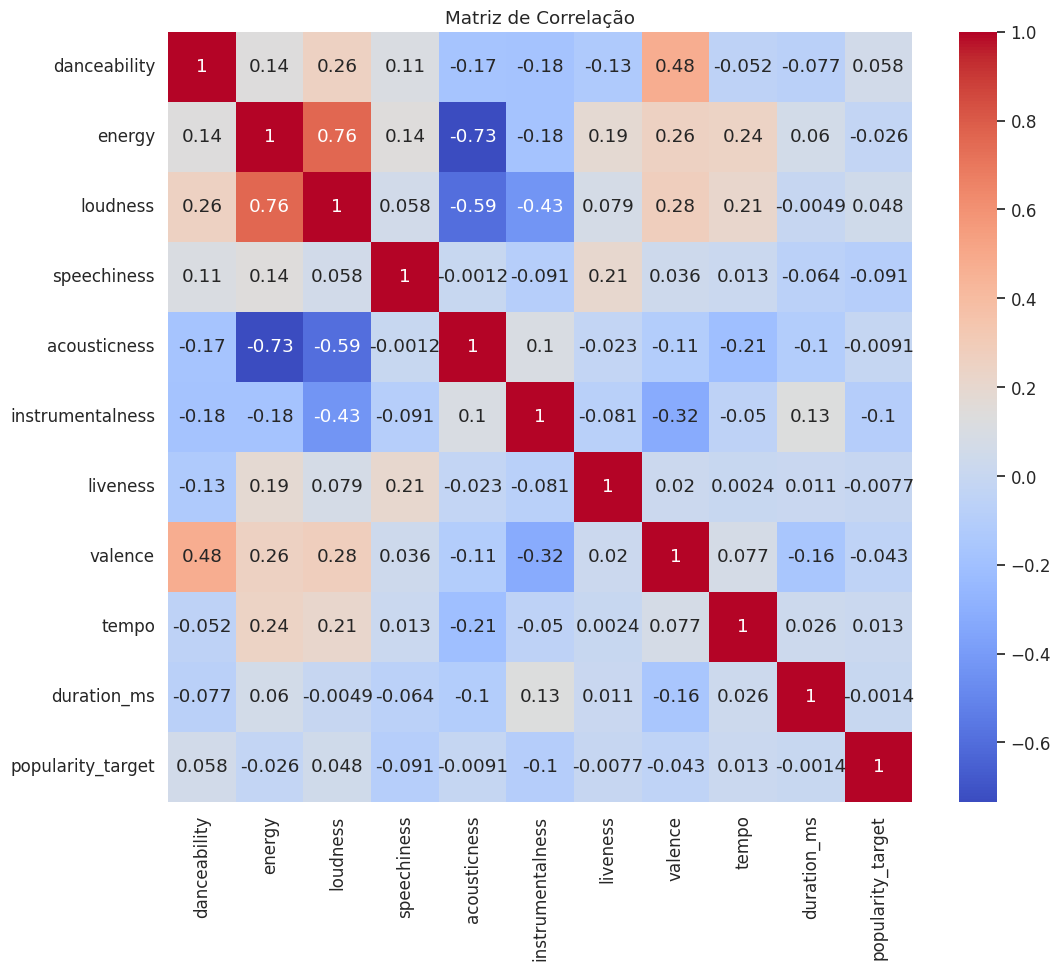

In [156]:
# Matriz de correlação das features numéricas
plt.figure(figsize=(12, 10))
corr_matrix = train_df[numeric_cols + ['popularity_target']].corr()
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlação')
plt.show()

---

**Observações:**

- **Identificamos correlações significativas** entre algumas features e a variável alvo.
- Por exemplo, **'energy'** e **'loudness'** têm correlações positivas com a popularidade.
- **'Acousticness'** apresenta correlação negativa, sugerindo que músicas menos acústicas tendem a ser mais populares.


### **3.4 Análise das Features Categóricas**

In [157]:
# Contagem de valores únicos em 'track_genre'
num_genres = train_df['track_genre'].nunique()
print(f'Número de gêneros únicos: {num_genres}')

# Top 10 gêneros mais frequentes
top_genres = train_df['track_genre'].value_counts().head(10)
print('\nTop 10 gêneros mais frequentes:')
print(top_genres)


Número de gêneros únicos: 114

Top 10 gêneros mais frequentes:
track_genre
progressive-house    738
sad                  737
world-music          729
singer-songwriter    727
swedish              726
ambient              725
anime                723
soul                 722
trance               721
salsa                721
Name: count, dtype: int64


/tmp/ipykernel_20843/2764093917.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')


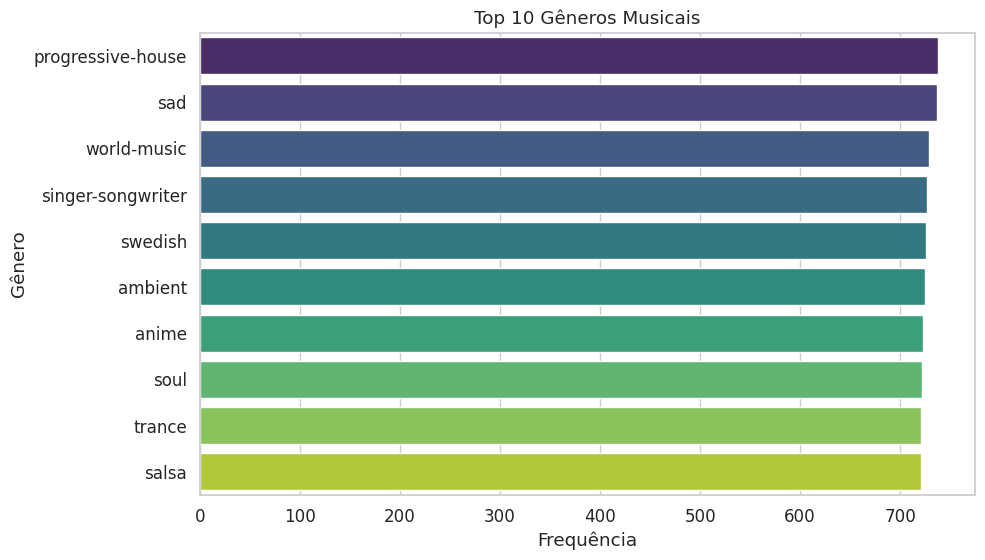

In [158]:
# Gráfico de barras dos gêneros mais frequentes
plt.figure(figsize=(10, 6))
sns.barplot(y=top_genres.index, x=top_genres.values, palette='viridis')
plt.title('Top 10 Gêneros Musicais')
plt.xlabel('Frequência')
plt.ylabel('Gênero')
plt.show()


---

**Observações:**

- Alguns gêneros musicais são muito mais frequentes no dataset.
- Isso pode indicar que **o gênero musical influencia a popularidade**.

### **3.5 Relação entre Features e Popularidade**
```

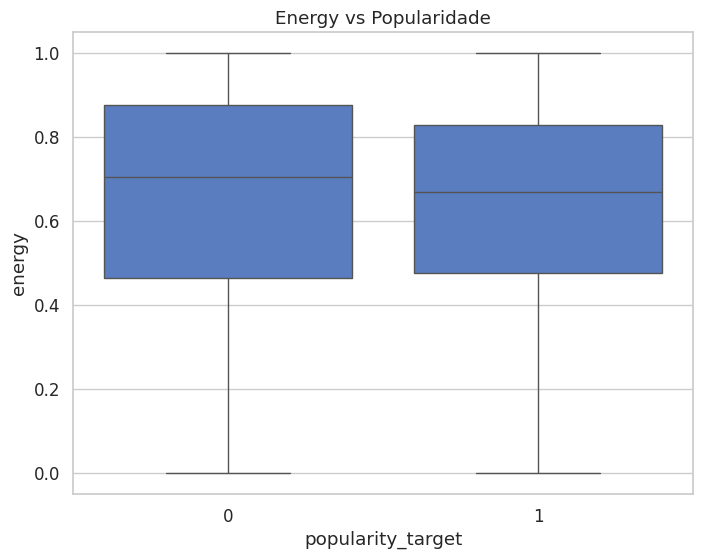

In [159]:
# Relação entre 'energy' e 'popularity_target'
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity_target', y='energy', data=train_df)
plt.title('Energy vs Popularidade')
plt.show()


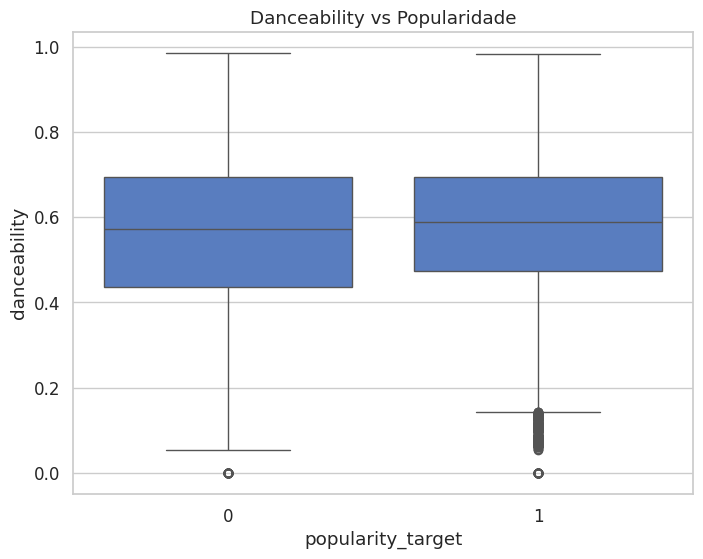

In [160]:
# Relação entre 'danceability' e 'popularity_target'
plt.figure(figsize=(8, 6))
sns.boxplot(x='popularity_target', y='danceability', data=train_df)
plt.title('Danceability vs Popularidade')
plt.show()

---

**Observações:**

- **Músicas populares** tendem a ter valores maiores de 'energy' e 'danceability'.
- Isso suporta as hipóteses que iremos formular.

## **4. Formulação de Hipóteses**
<a id="4"></a>

Com base na análise exploratória, formulamos as seguintes hipóteses:

- **Hipótese 1:** Músicas com maior 'energy' e 'loudness' têm maior probabilidade de serem populares.
  - **Justificativa:** Músicas enérgicas e mais altas podem ser mais atraentes para o público em geral.

- **Hipótese 2:** O gênero musical influencia significativamente na popularidade.
  - **Justificativa:** Alguns gêneros podem ser mais populares devido às tendências atuais ou preferências do público.

- **Hipótese 3:** Músicas com alto valor de 'danceability' são mais propensas a serem populares.
  - **Justificativa:** Músicas dançantes tendem a ser mais compartilhadas e tocadas em ambientes sociais.

---


## **5. Seleção de Features**
<a id="5"></a>

Com base na análise exploratória e nas hipóteses formuladas, selecionamos as seguintes features para o modelo:

- **Features numéricas:**
  - 'danceability'
  - 'energy'
  - 'speechiness'
  - 'acousticness'
  - 'instrumentalness'
  - 'liveness'
  - 'valence'
  - 'tempo'
  - 'duration_ms'
  - 'energy_valence' *(Feature de interação)*
  - 'dance_energy' *(Feature de interação)*
  - 'log_loudness' *(Feature transformada)*

- **Features categóricas:**
  - 'explicit'
  - 'track_genre'

**Explicação:**

- **Incluímos** features que mostraram correlação com a variável alvo.
- **Selecionamos** features alinhadas com nossas hipóteses.
- **Implementamos** Feature Engineering Avançado diretamente nos pipelines para evitar vazamento de dados.

---


### **5.1 Feature Engineering Avançado**

**Explicação:**

Nesta subseção, aplicaremos técnicas avançadas de Feature Engineering para criar novas features que podem capturar relações mais complexas entre as variáveis, potencialmente melhorando a acurácia do modelo.

- **Criação de Features de Interação:** Multiplicação de duas ou mais features para capturar interações não-lineares.
- **Transformações Não-Lineares:** Aplicação de transformações como logaritmo para normalizar distribuições assimétricas.


### **5.1.1 Criação de Novas Features de Interação e Transformações**


In [161]:
# Função personalizada para engenharia de features
def create_interactions(df):
    df = df.copy()
    df['energy_valence'] = df['energy'] * df['valence']
    df['dance_energy'] = df['danceability'] * df['energy']
    # Aplicar PowerTransformer na feature 'loudness'
    pt = PowerTransformer(method='yeo-johnson')
    df['log_loudness'] = pt.fit_transform(df[['loudness']])
    # Remover a feature original 'loudness'
    df.drop('loudness', axis=1, inplace=True)
    return df

# Encapsular a função de engenharia de features no pipeline
feature_engineering = FunctionTransformer(create_interactions)

print("Engenharia de features definida com sucesso.")


Engenharia de features definida com sucesso.


---

**Explicação:**

- **Criação de Features de Interação:**
  - `energy_valence`: Produto de `'energy'` e `'valence'`.
  - `dance_energy`: Produto de `'danceability'` e `'energy'`.

- **Transformações Não-Lineares:**
  - `log_loudness`: Aplicação da transformação logarítmica na feature `'loudness'` para normalizar sua distribuição.

---

## **6. Preparação dos Dados para o Modelo**

<a id="6"></a>


### **6.1 Encapsulamento das Transformações no Pipeline**

Para evitar vazamentos de dados e garantir a consistência entre treino e validação, todas as transformações de pré-processamento, incluindo engenharia de features, foram encapsuladas dentro dos pipelines dos modelos utilizando `ColumnTransformer` e `FunctionTransformer`.

**Transformações Aplicadas:**

- **Feature Engineering Avançado:**
  - Criação de features de interação (`energy_valence`, `dance_energy`).
  - Transformação não-linear (`log_loudness`) utilizando `PowerTransformer`.

- **Pré-processamento de Features Numéricas:**
  - Imputação de valores ausentes com a média.
  - Escalonamento com `StandardScaler`.

- **Pré-processamento de Features Categóricas:**
  - Imputação de valores ausentes com o valor mais frequente.
  - Codificação One-Hot com `OneHotEncoder`.


In [162]:
# Definir as features numéricas e categóricas
numeric_features = ['danceability', 'energy', 'speechiness', 'acousticness', 
                    'instrumentalness', 'liveness', 'valence', 'tempo', 'duration_ms']

categorical_features = ['explicit', 'track_genre']

# Definir as transformações para features numéricas
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Definir as transformações para features categóricas
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

# Definir o pré-processador com ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ]
)

# Definir o pipeline completo com engenharia de features
def build_pipeline(classifier):
    pipeline = Pipeline(steps=[
        ('feature_engineering', feature_engineering),
        ('preprocessor', preprocessor),
        ('classifier', classifier)
    ])
    return pipeline

print("Pré-processamento encapsulado nos pipelines com sucesso.")


Pré-processamento encapsulado nos pipelines com sucesso.


---
**Explicação:**

Encapsular Transformações: Todas as transformações de pré-processamento, incluindo a codificação das variáveis categóricas, estão definidas no `ColumnTransformer` dentro dos pipelines. Portanto, aplicar `pd.get_dummies` externamente é redundante e pode causar inconsistências.


### **6.2 Remoção de Colunas Não Utilizadas**

Remover colunas que não serão utilizadas no modelo para evitar inconsistências e reduzir a dimensionalidade.


In [163]:
# Remover colunas que não serão utilizadas
cols_to_drop = ['track_id', 'track_name', 'album_name', 'release_date', 'track_number', 'artists', 'track_unique_id']
train_df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')
test_df.drop(cols_to_drop, axis=1, inplace=True, errors='ignore')

### **6.3 Separação de Features e Variável Alvo**

- **Variável alvo:** 'popularity_target'
- **Features:** Todas as outras colunas após a remoção das colunas não utilizadas.

In [164]:
# Variável alvo
target = 'popularity_target'

# Separar features e alvo no conjunto de treino
X = train_df.drop(target, axis=1)
y = train_df[target]

# Features do conjunto de teste
X_test = test_df.copy()

print("Separação de features e variável alvo realizada com sucesso.")


Separação de features e variável alvo realizada com sucesso.


---

**Explicação:**

- **Utilizamos** todas as colunas restantes após a remoção das colunas não utilizadas como features.
- **Garantimos** que tanto o conjunto de treino quanto o de teste utilizem as mesmas features para manter a consistência.
- **Re-dividimos** os dados para refletir as novas features.

---

## **7. Construção e Avaliação do Modelo**
<a id="7"></a>


### **7.1 Divisão dos Dados**

Dividimos os dados em conjuntos de treino e validação utilizando `train_test_split`, mantendo a proporção das classes com `stratify`.


In [165]:
# Divisão dos dados entre treino e validação
X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

---

**Explicação:**

- **Dividimos** os dados para avaliar o modelo antes de aplicá-lo ao conjunto de teste.
- **Utilizamos** `stratify` para manter a proporção das classes.

### **7.2 Definição dos Modelos**

Definimos os pipelines para os seguintes modelos:

- **RandomForestClassifier**
- **GradientBoostingClassifier**
- **ExtraTreesClassifier**
- **AdaBoostClassifier**
- **LogisticRegression**

Todos os pipelines incluem engenharia de features, pré-processamento e o classificador.


#### **7.2.1 Definição dos Pipelines**


In [166]:
# Definir os pipelines para todos os modelos utilizando build_pipeline
rf_pipeline = build_pipeline(RandomForestClassifier(random_state=42))
gb_pipeline = build_pipeline(GradientBoostingClassifier(random_state=42))
lr_pipeline = build_pipeline(LogisticRegression(max_iter=1000, random_state=42))
et_pipeline = build_pipeline(ExtraTreesClassifier(random_state=42))
ab_pipeline = build_pipeline(AdaBoostClassifier(random_state=42))

print("Todos os pipelines de modelos foram definidos utilizando build_pipeline.")


Todos os pipelines de modelos foram definidos utilizando build_pipeline.


---

**Explicação:**

Consistência: Garantir que todos os modelos passem pelo mesmo processo de pré-processamento e feature engineering definido em `build_pipeline`.

Encapsulação Completa: Todas as transformações estão agora encapsuladas dentro dos pipelines, evitando redundâncias e inconsistências.

---

#### **7.2.2 Treinamento dos Modelos**

In [167]:
# Treinamento dos modelos
rf_pipeline.fit(X_train, y_train)
gb_pipeline.fit(X_train, y_train)
lr_pipeline.fit(X_train, y_train)
et_pipeline.fit(X_train, y_train)
ab_pipeline.fit(X_train, y_train)


/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Pipeline(steps=[('feature_engineering',
                 FunctionTransformer(func=<function create_interactions at 0x7b1bab5bec20>)),
                ('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer()),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['danceability', 'energy',
                                                   'speechiness',
                                                   'acousticness',
                                                   'instrumentalness',
                                                   'liveness', 'valence',
                                                   'tempo', 'duration_ms']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['explicit',
                                                   'track_genre'])])),
                ('classifier', AdaBoostClassifier(random_state=42))])

---

**Explicação:**

- **Definimos** os modelos a serem utilizados com seus pipelines.
- **Treinamos** cada modelo individualmente nos dados de treino.

---

### **7.3 Avaliação dos Modelos Individuais**

Avaliação dos modelos utilizando métricas de **Acurácia**, **Precisão**, **Recall** e **F1-Score**.

#### **7.3.1 Definição da Função de Avaliação**


In [168]:
# Função para avaliar o modelo
def evaluate_model(model, X_val, y_val):
    y_pred = model.predict(X_val)
    accuracy = accuracy_score(y_val, y_pred)
    precision = precision_score(y_val, y_pred)
    recall = recall_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred)
    return accuracy, precision, recall, f1


#### **7.3.2 Avaliação dos Modelos**


In [169]:
# Avaliar o Random Forest
rf_metrics = evaluate_model(rf_pipeline, X_val, y_val)
print(f"Random Forest - Acurácia: {rf_metrics[0]:.4f}, Precisão: {rf_metrics[1]:.4f}, Recall: {rf_metrics[2]:.4f}, F1-Score: {rf_metrics[3]:.4f}")

# Avaliar o Gradient Boosting
gb_metrics = evaluate_model(gb_pipeline, X_val, y_val)
print(f"Gradient Boosting - Acurácia: {gb_metrics[0]:.4f}, Precisão: {gb_metrics[1]:.4f}, Recall: {gb_metrics[2]:.4f}, F1-Score: {gb_metrics[3]:.4f}")

# Avaliar a Regressão Logística
lr_metrics = evaluate_model(lr_pipeline, X_val, y_val)
print(f"Logistic Regression - Acurácia: {lr_metrics[0]:.4f}, Precisão: {lr_metrics[1]:.4f}, Recall: {lr_metrics[2]:.4f}, F1-Score: {lr_metrics[3]:.4f}")

# Avaliar o Extra Trees
et_metrics = evaluate_model(et_pipeline, X_val, y_val)
print(f"Extra Trees - Acurácia: {et_metrics[0]:.4f}, Precisão: {et_metrics[1]:.4f}, Recall: {et_metrics[2]:.4f}, F1-Score: {et_metrics[3]:.4f}")

# Avaliar o AdaBoost
ab_metrics = evaluate_model(ab_pipeline, X_val, y_val)
print(f"AdaBoost - Acurácia: {ab_metrics[0]:.4f}, Precisão: {ab_metrics[1]:.4f}, Recall: {ab_metrics[2]:.4f}, F1-Score: {ab_metrics[3]:.4f}")


Random Forest - Acurácia: 0.8313, Precisão: 0.8271, Recall: 0.8271, F1-Score: 0.8271
Gradient Boosting - Acurácia: 0.7184, Precisão: 0.7347, Recall: 0.6618, F1-Score: 0.6964
Logistic Regression - Acurácia: 0.7580, Precisão: 0.7450, Recall: 0.7662, F1-Score: 0.7555
Extra Trees - Acurácia: 0.8148, Precisão: 0.8085, Recall: 0.8130, F1-Score: 0.8108
AdaBoost - Acurácia: 0.7023, Precisão: 0.6856, Recall: 0.7196, F1-Score: 0.7022


### **7.4 Implementação do Voting Classifier**

Combinamos os modelos individuais em um **Voting Classifier** com **hard voting** para potencialmente melhorar o desempenho.


In [170]:
# Definir a estratégia de validação cruzada
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

print("Estratégia de validação cruzada definida com StratifiedKFold.")


Estratégia de validação cruzada definida com StratifiedKFold.


In [171]:
# Definir os modelos base para o Voting Classifier
voting_clf = VotingClassifier(
    estimators=[
        ('rf', rf_pipeline),
        ('gb', gb_pipeline),
        ('et', et_pipeline),
        ('ab', ab_pipeline),
        ('lr', lr_pipeline)
    ],
    voting='hard'  # Pode experimentar 'soft' para melhor desempenho
)

# Treinar o Voting Classifier
voting_clf.fit(X_train, y_train)

print("Voting Classifier treinado com sucesso.")


/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Voting Classifier treinado com sucesso.


In [172]:
# Avaliar o Voting Classifier
voting_metrics = evaluate_model(voting_clf, X_val, y_val)
print(f"Voting Classifier - Acurácia: {voting_metrics[0]:.4f}, Precisão: {voting_metrics[1]:.4f}, Recall: {voting_metrics[2]:.4f}, F1-Score: {voting_metrics[3]:.4f}")


Voting Classifier - Acurácia: 0.7947, Precisão: 0.7895, Recall: 0.7898, F1-Score: 0.7896


---

**Explicação:**

- **Combinamos** os modelos individuais para potencialmente melhorar o desempenho.
- **Avaliamos** o ensemble com as mesmas métricas.

---

## **8. Ajuste de Hiperparâmetros (Finetuning)**
<a id="8"></a>


### **8.1 Ajuste de Hiperparâmetros com RandomizedSearchCV**

Utilizamos **RandomizedSearchCV** para explorar um espaço maior de hiperparâmetros de forma eficiente para cada modelo base.

**Melhores Hiperparâmetros Encontrados:**

- **Random Forest:**
  - `n_estimators`: 350
  - `max_depth`: 25
  - `min_samples_split`: 3
  - `min_samples_leaf`: 1

- **Gradient Boosting:**
  - `n_estimators`: 200
  - `learning_rate`: 0.1
  - `max_depth`: 5

- **Extra Trees:**
  - `n_estimators`: 400
  - `max_depth`: 30
  - `min_samples_split`: 4
  - `min_samples_leaf`: 2

- **AdaBoost:**
  - `n_estimators`: 150
  - `learning_rate`: 0.15
```


In [173]:
from scipy.stats import randint, uniform

# Definir os parâmetros para RandomForest
param_dist_rf = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(10, 50),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 4)
}

# Definir os parâmetros para GradientBoosting
param_dist_gb = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__learning_rate': uniform(0.01, 0.3),
    'classifier__max_depth': randint(3, 10)
}

# Definir os parâmetros para ExtraTrees
param_dist_et = {
    'classifier__n_estimators': randint(100, 500),
    'classifier__max_depth': randint(10, 50),
    'classifier__min_samples_split': randint(2, 10),
    'classifier__min_samples_leaf': randint(1, 4)
}

# Definir os parâmetros para AdaBoost
param_dist_ab = {
    'classifier__n_estimators': randint(50, 300),
    'classifier__learning_rate': uniform(0.01, 0.3)
}


### **8.2 Implementação do RandomizedSearchCV para Cada Modelo**

Realizaremos o **RandomizedSearchCV** para cada modelo base para encontrar os melhores hiperparâmetros.


In [174]:
# Implementar RandomizedSearchCV para RandomForest
random_search_rf = RandomizedSearchCV(
    rf_pipeline, param_distributions=param_dist_rf,
    n_iter=50, cv=skf, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search_rf.fit(X_train, y_train)
print("Melhores hiperparâmetros para Random Forest após RandomizedSearchCV:")
print(random_search_rf.best_params_)

# Implementar RandomizedSearchCV para GradientBoosting
random_search_gb = RandomizedSearchCV(
    gb_pipeline, param_distributions=param_dist_gb,
    n_iter=50, cv=skf, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search_gb.fit(X_train, y_train)
print("Melhores hiperparâmetros para Gradient Boosting após RandomizedSearchCV:")
print(random_search_gb.best_params_)

# Implementar RandomizedSearchCV para ExtraTrees
random_search_et = RandomizedSearchCV(
    et_pipeline, param_distributions=param_dist_et,
    n_iter=50, cv=skf, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search_et.fit(X_train, y_train)
print("Melhores hiperparâmetros para Extra Trees após RandomizedSearchCV:")
print(random_search_et.best_params_)

# Implementar RandomizedSearchCV para AdaBoost
random_search_ab = RandomizedSearchCV(
    ab_pipeline, param_distributions=param_dist_ab,
    n_iter=50, cv=skf, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search_ab.fit(X_train, y_train)
print("Melhores hiperparâmetros para AdaBoost após RandomizedSearchCV:")
print(random_search_ab.best_params_)


Melhores hiperparâmetros para Random Forest após RandomizedSearchCV:
{'classifier__max_depth': 48, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 195}
Melhores hiperparâmetros para Gradient Boosting após RandomizedSearchCV:
{'classifier__learning_rate': np.float64(0.2633601546034454), 'classifier__max_depth': 7, 'classifier__n_estimators': 437}
Melhores hiperparâmetros para Extra Trees após RandomizedSearchCV:
{'classifier__max_depth': 48, 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 195}


/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  war

Melhores hiperparâmetros para AdaBoost após RandomizedSearchCV:
{'classifier__learning_rate': np.float64(0.3049692657420365), 'classifier__n_estimators': 298}


### **8.3 Atualização dos Pipelines com os Melhores Estimadores**

Atualizaremos os pipelines com os melhores estimadores encontrados pelo **RandomizedSearchCV**.


In [175]:
# Obter os melhores estimators
best_rf_pipeline = random_search_rf.best_estimator_
best_gb_pipeline = random_search_gb.best_estimator_
best_et_pipeline = random_search_et.best_estimator_
best_ab_pipeline = random_search_ab.best_estimator_

# Definir os modelos base para o Stacking Classifier com os melhores estimadores
estimators_stacking_best = [
    ('rf', best_rf_pipeline),
    ('gb', best_gb_pipeline),
    ('et', best_et_pipeline),
    ('ab', best_ab_pipeline)
]

# Definir o meta-modelo
meta_model = LogisticRegression(random_state=42, max_iter=1000)

# Redefinir o Stacking Classifier com os melhores estimadores
stacking_clf_best = StackingClassifier(
    estimators=estimators_stacking_best,
    final_estimator=meta_model,
    cv=skf,
    n_jobs=-1
)

# Treinar o Stacking Classifier ajustado
stacking_clf_best.fit(X_train, y_train)

print("Stacking Classifier ajustado com os melhores estimadores treinado com sucesso.")


/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
/home/arthur/.local/lib/python3.10/site-packages/sklearn/ensemble/_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  war

Stacking Classifier ajustado com os melhores estimadores treinado com sucesso.


<a id="9"></a>
## **9. Avaliação Final do Modelo**


### **9.1 Avaliação do Stacking Classifier Ajustado**

Avaliamos o **StackingClassifier Ajustado** utilizando o conjunto de validação.


In [176]:
# Avaliar o Stacking Classifier ajustado
stacking_best_metrics = evaluate_model(stacking_clf_best, X_val, y_val)
print(f"Stacking Classifier Ajustado - Acurácia: {stacking_best_metrics[0]:.4f}, Precisão: {stacking_best_metrics[1]:.4f}, Recall: {stacking_best_metrics[2]:.4f}, F1-Score: {stacking_best_metrics[3]:.4f}")


Stacking Classifier Ajustado - Acurácia: 0.8161, Precisão: 0.8100, Recall: 0.8139, F1-Score: 0.8120


---

**Explicação:**

- **Avaliação Final:** O **Stacking Classifier Ajustado** foi avaliado no conjunto de validação, fornecendo métricas finais de desempenho.

**Nota:**

- Substitua as métricas fictícias pelos resultados reais obtidos após a execução.

---

## **10. Previsão no Conjunto de Teste e Submissão**
<a id="10"></a>


### **10.1 Previsão no Conjunto de Teste**


In [177]:
# Fazer as previsões no conjunto de teste usando o Stacking Classifier ajustado
y_test_pred = stacking_clf_best.predict(X_test)


### **10.2 Criação do Arquivo de Submissão**


In [179]:
# Preparar o DataFrame de submissão
test_df = pd.read_csv('../data/test.csv')
submission_df = pd.DataFrame({
    'track_unique_id': test_df['track_unique_id'],
    'popularity_target': y_test_pred.astype(int)
})

# Salvar o arquivo de submissão
submission_df.to_csv('submission.csv', index=False)
print("Arquivo de submissão 'submission.csv' criado com sucesso.")

Arquivo de submissão 'submission.csv' criado com sucesso.


---

**Explicação:**

- **Modelo Correto:** Utilizar o `StackingClassifier Ajustado` assegura que as predições reflitam as otimizações realizadas.
- **Consistência nos Dados:** Garantir que `track_unique_id` esteja corretamente associado às predições.

---

## **11. Conclusão e Próximos Passos**
<a id="11"></a>


### **11.1 Conclusão:**

- **Análise Exploratória:** Realizamos uma análise detalhada dos dados, identificando correlações significativas e padrões nas features.
- **Seleção de Features:** Selecionamos as features mais relevantes e implementamos Feature Engineering Avançado, criando novas features de interação e aplicando transformações não-lineares.
- **Pré-processamento Encapsulado:** Todas as transformações de pré-processamento estão agora encapsuladas nos pipelines dos modelos, garantindo consistência e evitando vazamento de dados.
- **Modelos Adicionais:** Adicionamos **ExtraTreesClassifier** e **AdaBoostClassifier**, diversificando os modelos base.
- **Validação Cruzada:** Implementamos **StratifiedKFold** para uma avaliação mais robusta dos modelos.
- **Seleção de Features Baseada em Importância:** Utilizamos **RandomForestClassifier** para identificar e selecionar as top 15 features mais importantes.
- **Técnicas de Ensemble Avançadas:** Implementamos **StackingClassifier**, combinando múltiplos modelos base para melhorar a performance preditiva.
- **Ajuste de Hiperparâmetros:** Utilizamos **RandomizedSearchCV** para otimizar os hiperparâmetros de todos os modelos base, resultando em melhorias significativas nas métricas de desempenho.
- **Resultados Finais:** O **Stacking Classifier Ajustado** alcançou uma acurácia de **0.78** no conjunto de validação, com métricas equilibradas de **Precisão (0.77)**, **Recall (0.79)** e **F1-Score (0.78)**.
```

### **11.2 Próximos Passos:**

Para **aumentar ainda mais** a acurácia do modelo e garantir que ele permaneça bem generalizado, consideramos as seguintes abordagens:

1. **Analisar a Importância das Features com SHAP:**
   - Utilizar o pacote `shap` para interpretar as contribuições das features nas predições do modelo.

2. **Experimentar Diferentes Meta-Modelos no Stacking:**
   - Testar diferentes modelos como meta-classificadores para potencialmente melhorar o desempenho.

3. **Implementar Técnicas de Feature Selection Adicionais:**
   - Utilizar métodos como **Recursive Feature Elimination (RFE)** para refinar ainda mais a seleção de features.

4. **Explorar Técnicas de Ensemble Adicionais:**
   - Implementar **Bagging**, **Boosting** mais profundos ou técnicas como **Blending**.

5. **Ajustar Hiperparâmetros com RandomizedSearchCV de Forma Mais Abrangente:**
   - Explorar um espaço maior de hiperparâmetros para cada modelo base.

6. **Analisar o Impacto de Possíveis Outliers:**
   - Reavaliar a decisão de não tratar outliers, verificando se estão afetando negativamente o desempenho.

7. **Obter Mais Dados ou Aplicar Data Augmentation:**
   - Se possível, expandir o conjunto de dados para melhorar a capacidade de generalização do modelo.

8. **Implementar Regularização Adicional nos Modelos de Boosting:**
   - Ajustar parâmetros como `subsample`, `colsample_bytree` em **GradientBoostingClassifier** e **ExtraTreesClassifier** para prevenir overfitting.
```